## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.2ms	remaining: 52.1s
1:	learn: 0.9301086	total: 55.8ms	remaining: 27.8s
2:	learn: 0.9005637	total: 59.3ms	remaining: 19.7s
3:	learn: 0.8720983	total: 63ms	remaining: 15.7s
4:	learn: 0.8467410	total: 66.2ms	remaining: 13.2s
5:	learn: 0.8226672	total: 69.1ms	remaining: 11.5s
6:	learn: 0.7994702	total: 72.1ms	remaining: 10.2s
7:	learn: 0.7784272	total: 75.3ms	remaining: 9.33s
8:	learn: 0.7602192	total: 78.5ms	remaining: 8.64s
9:	learn: 0.7412421	total: 81.7ms	remaining: 8.09s
10:	learn: 0.7247930	total: 87.7ms	remaining: 7.88s
11:	learn: 0.7089951	total: 90.6ms	remaining: 7.46s
12:	learn: 0.6951345	total: 93.4ms	remaining: 7.09s
13:	learn: 0.6809276	total: 96.3ms	remaining: 6.78s
14:	learn: 0.6692630	total: 99.6ms	remaining: 6.54s
15:	learn: 0.6588323	total: 102ms	remaining: 6.29s
16:	learn: 0.6472700	total: 106ms	remaining: 6.1s
17:	learn: 0.6379982	total: 108ms	remaining: 5.91s
18:	learn: 0.6294674	total: 112ms	remaining: 5.76s

43:	learn: 0.5116444	total: 186ms	remaining: 4.04s
44:	learn: 0.5100547	total: 189ms	remaining: 4.01s
45:	learn: 0.5069096	total: 192ms	remaining: 3.98s
46:	learn: 0.5051685	total: 195ms	remaining: 3.94s
47:	learn: 0.5033968	total: 198ms	remaining: 3.92s
48:	learn: 0.5012433	total: 200ms	remaining: 3.89s
49:	learn: 0.4986132	total: 203ms	remaining: 3.86s
50:	learn: 0.4968022	total: 206ms	remaining: 3.83s
51:	learn: 0.4951632	total: 209ms	remaining: 3.81s
52:	learn: 0.4928924	total: 212ms	remaining: 3.78s
53:	learn: 0.4917272	total: 215ms	remaining: 3.76s
54:	learn: 0.4895079	total: 217ms	remaining: 3.73s
55:	learn: 0.4881884	total: 220ms	remaining: 3.71s
56:	learn: 0.4861566	total: 223ms	remaining: 3.69s
57:	learn: 0.4850201	total: 226ms	remaining: 3.67s
58:	learn: 0.4840055	total: 229ms	remaining: 3.65s
59:	learn: 0.4824455	total: 232ms	remaining: 3.63s
60:	learn: 0.4809744	total: 235ms	remaining: 3.62s
61:	learn: 0.4801376	total: 238ms	remaining: 3.6s
62:	learn: 0.4792422	total: 241m

106:	learn: 0.4451085	total: 378ms	remaining: 3.15s
107:	learn: 0.4447909	total: 380ms	remaining: 3.14s
108:	learn: 0.4440936	total: 383ms	remaining: 3.13s
109:	learn: 0.4435519	total: 386ms	remaining: 3.12s
110:	learn: 0.4431075	total: 389ms	remaining: 3.12s
111:	learn: 0.4425498	total: 392ms	remaining: 3.11s
112:	learn: 0.4419106	total: 395ms	remaining: 3.1s
113:	learn: 0.4414425	total: 398ms	remaining: 3.09s
114:	learn: 0.4407446	total: 400ms	remaining: 3.08s
115:	learn: 0.4402011	total: 403ms	remaining: 3.07s
116:	learn: 0.4398559	total: 406ms	remaining: 3.06s
117:	learn: 0.4392990	total: 408ms	remaining: 3.05s
118:	learn: 0.4389153	total: 411ms	remaining: 3.04s
119:	learn: 0.4383331	total: 414ms	remaining: 3.04s
120:	learn: 0.4378136	total: 417ms	remaining: 3.03s
121:	learn: 0.4375553	total: 420ms	remaining: 3.02s
122:	learn: 0.4369995	total: 424ms	remaining: 3.02s
123:	learn: 0.4366325	total: 427ms	remaining: 3.02s
124:	learn: 0.4362823	total: 430ms	remaining: 3.01s
125:	learn: 0

161:	learn: 0.4197073	total: 567ms	remaining: 2.94s
162:	learn: 0.4192052	total: 570ms	remaining: 2.93s
163:	learn: 0.4187949	total: 573ms	remaining: 2.92s
164:	learn: 0.4184572	total: 576ms	remaining: 2.92s
165:	learn: 0.4180680	total: 579ms	remaining: 2.91s
166:	learn: 0.4176884	total: 582ms	remaining: 2.9s
167:	learn: 0.4173026	total: 585ms	remaining: 2.9s
168:	learn: 0.4170486	total: 587ms	remaining: 2.89s
169:	learn: 0.4165960	total: 590ms	remaining: 2.88s
170:	learn: 0.4161870	total: 593ms	remaining: 2.88s
171:	learn: 0.4156228	total: 596ms	remaining: 2.87s
172:	learn: 0.4153041	total: 599ms	remaining: 2.86s
173:	learn: 0.4148857	total: 602ms	remaining: 2.85s
174:	learn: 0.4144190	total: 604ms	remaining: 2.85s
175:	learn: 0.4140875	total: 607ms	remaining: 2.84s
176:	learn: 0.4136755	total: 610ms	remaining: 2.83s
177:	learn: 0.4133860	total: 613ms	remaining: 2.83s
178:	learn: 0.4129780	total: 616ms	remaining: 2.82s
179:	learn: 0.4122907	total: 619ms	remaining: 2.82s
180:	learn: 0.

226:	learn: 0.3968841	total: 760ms	remaining: 2.59s
227:	learn: 0.3965787	total: 763ms	remaining: 2.58s
228:	learn: 0.3963073	total: 765ms	remaining: 2.58s
229:	learn: 0.3960925	total: 768ms	remaining: 2.57s
230:	learn: 0.3957018	total: 771ms	remaining: 2.57s
231:	learn: 0.3954162	total: 774ms	remaining: 2.56s
232:	learn: 0.3951665	total: 777ms	remaining: 2.56s
233:	learn: 0.3949269	total: 779ms	remaining: 2.55s
234:	learn: 0.3945894	total: 783ms	remaining: 2.55s
235:	learn: 0.3944181	total: 785ms	remaining: 2.54s
236:	learn: 0.3941497	total: 789ms	remaining: 2.54s
237:	learn: 0.3939819	total: 791ms	remaining: 2.53s
238:	learn: 0.3938322	total: 794ms	remaining: 2.53s
239:	learn: 0.3935463	total: 797ms	remaining: 2.52s
240:	learn: 0.3933166	total: 801ms	remaining: 2.52s
241:	learn: 0.3930992	total: 804ms	remaining: 2.52s
242:	learn: 0.3928898	total: 807ms	remaining: 2.51s
243:	learn: 0.3926199	total: 810ms	remaining: 2.51s
244:	learn: 0.3923955	total: 812ms	remaining: 2.5s
245:	learn: 0

290:	learn: 0.3815253	total: 952ms	remaining: 2.32s
291:	learn: 0.3813529	total: 955ms	remaining: 2.31s
292:	learn: 0.3812172	total: 958ms	remaining: 2.31s
293:	learn: 0.3809978	total: 961ms	remaining: 2.31s
294:	learn: 0.3807825	total: 964ms	remaining: 2.3s
295:	learn: 0.3805940	total: 967ms	remaining: 2.3s
296:	learn: 0.3801959	total: 971ms	remaining: 2.3s
297:	learn: 0.3799439	total: 974ms	remaining: 2.29s
298:	learn: 0.3797228	total: 977ms	remaining: 2.29s
299:	learn: 0.3795554	total: 980ms	remaining: 2.29s
300:	learn: 0.3793733	total: 983ms	remaining: 2.28s
301:	learn: 0.3791607	total: 986ms	remaining: 2.28s
302:	learn: 0.3789297	total: 989ms	remaining: 2.27s
303:	learn: 0.3787482	total: 992ms	remaining: 2.27s
304:	learn: 0.3786528	total: 995ms	remaining: 2.27s
305:	learn: 0.3784406	total: 998ms	remaining: 2.26s
306:	learn: 0.3782934	total: 1s	remaining: 2.26s
307:	learn: 0.3781631	total: 1s	remaining: 2.25s
308:	learn: 0.3779278	total: 1.01s	remaining: 2.25s
309:	learn: 0.3777358

352:	learn: 0.3697314	total: 1.14s	remaining: 2.1s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.09s
354:	learn: 0.3694397	total: 1.15s	remaining: 2.09s
355:	learn: 0.3692589	total: 1.15s	remaining: 2.09s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.08s
357:	learn: 0.3689645	total: 1.16s	remaining: 2.08s
358:	learn: 0.3687886	total: 1.16s	remaining: 2.07s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.07s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.07s
361:	learn: 0.3683909	total: 1.17s	remaining: 2.06s
362:	learn: 0.3682710	total: 1.17s	remaining: 2.06s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.06s
364:	learn: 0.3679761	total: 1.18s	remaining: 2.05s
365:	learn: 0.3677932	total: 1.18s	remaining: 2.05s
366:	learn: 0.3676022	total: 1.19s	remaining: 2.05s
367:	learn: 0.3674148	total: 1.19s	remaining: 2.04s
368:	learn: 0.3673439	total: 1.19s	remaining: 2.04s
369:	learn: 0.3671985	total: 1.2s	remaining: 2.04s
370:	learn: 0.3670563	total: 1.2s	remaining: 2.03s
371:	learn: 0.3

412:	learn: 0.3602055	total: 1.33s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.35s	remaining: 1.91s
414:	learn: 0.3597887	total: 1.35s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.9s
416:	learn: 0.3594487	total: 1.36s	remaining: 1.9s
417:	learn: 0.3592759	total: 1.36s	remaining: 1.9s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.89s
419:	learn: 0.3589470	total: 1.37s	remaining: 1.89s
420:	learn: 0.3587972	total: 1.37s	remaining: 1.89s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.88s
422:	learn: 0.3585620	total: 1.38s	remaining: 1.88s
423:	learn: 0.3584427	total: 1.38s	remaining: 1.88s
424:	learn: 0.3583044	total: 1.38s	remaining: 1.87s
425:	learn: 0.3581698	total: 1.39s	remaining: 1.87s
426:	learn: 0.3580461	total: 1.39s	remaining: 1.87s
427:	learn: 0.3579182	total: 1.39s	remaining: 1.86s
428:	learn: 0.3577521	total: 1.4s	remaining: 1.86s
429:	learn: 0.3576138	total: 1.4s	remaining: 1.85s
430:	learn: 0.3575528	total: 1.4s	remaining: 1.85s
431:	learn: 0.357468

473:	learn: 0.3514906	total: 1.53s	remaining: 1.7s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.67s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.66s
483:	learn: 0.3500494	total: 1.55s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.65s
485:	learn: 0.3497143	total: 1.56s	remaining: 1.65s
486:	learn: 0.3496172	total: 1.56s	remaining: 1.65s
487:	learn: 0.3494609	total: 1.57s	remaining: 1.64s
488:	learn: 0.3493200	total: 1.57s	remaining: 1.64s
489:	learn: 0.3491550	total: 1.57s	remaining: 1.64s
490:	learn: 0.3490323	total: 1.58s	remaining: 1.64s
491:	learn: 0.3488767	total: 1.58s	remaining: 1.63s
492:	learn: 0

534:	learn: 0.3433236	total: 1.72s	remaining: 1.49s
535:	learn: 0.3432219	total: 1.72s	remaining: 1.49s
536:	learn: 0.3431615	total: 1.73s	remaining: 1.49s
537:	learn: 0.3430198	total: 1.73s	remaining: 1.48s
538:	learn: 0.3429422	total: 1.73s	remaining: 1.48s
539:	learn: 0.3428024	total: 1.73s	remaining: 1.48s
540:	learn: 0.3426641	total: 1.74s	remaining: 1.47s
541:	learn: 0.3425885	total: 1.74s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.74s	remaining: 1.47s
543:	learn: 0.3423997	total: 1.75s	remaining: 1.46s
544:	learn: 0.3422315	total: 1.75s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.75s	remaining: 1.46s
546:	learn: 0.3419673	total: 1.75s	remaining: 1.45s
547:	learn: 0.3418121	total: 1.76s	remaining: 1.45s
548:	learn: 0.3416228	total: 1.76s	remaining: 1.45s
549:	learn: 0.3414331	total: 1.76s	remaining: 1.44s
550:	learn: 0.3413090	total: 1.77s	remaining: 1.44s
551:	learn: 0.3411591	total: 1.77s	remaining: 1.44s
552:	learn: 0.3410901	total: 1.77s	remaining: 1.43s
553:	learn: 

594:	learn: 0.3368150	total: 1.91s	remaining: 1.3s
595:	learn: 0.3367491	total: 1.91s	remaining: 1.3s
596:	learn: 0.3366496	total: 1.92s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.92s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.29s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.93s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.28s
602:	learn: 0.3360683	total: 1.93s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.94s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.94s	remaining: 1.27s
605:	learn: 0.3358268	total: 1.94s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.95s	remaining: 1.26s
607:	learn: 0.3355448	total: 1.95s	remaining: 1.26s
608:	learn: 0.3354512	total: 1.95s	remaining: 1.25s
609:	learn: 0.3353398	total: 1.96s	remaining: 1.25s
610:	learn: 0.3352669	total: 1.96s	remaining: 1.25s
611:	learn: 0.3351716	total: 1.96s	remaining: 1.24s
612:	learn: 0.3351155	total: 1.97s	remaining: 1.24s
613:	learn: 0.

657:	learn: 0.3304900	total: 2.1s	remaining: 1.09s
658:	learn: 0.3303842	total: 2.1s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.11s	remaining: 1.08s
660:	learn: 0.3300983	total: 2.11s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.11s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.11s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.12s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.12s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.12s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.13s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.13s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.13s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.13s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.14s	remaining: 1.05s
671:	learn: 0.3289913	total: 2.14s	remaining: 1.04s
672:	learn: 0.3288859	total: 2.14s	remaining: 1.04s
673:	learn: 0.3288145	total: 2.15s	remaining: 1.04s
674:	learn: 0.3286969	total: 2.15s	remaining: 1.03s
675:	learn: 0.3286108	total: 2.15s	remaining: 1.03s
676:	learn: 0.

719:	learn: 0.3246676	total: 2.29s	remaining: 892ms
720:	learn: 0.3245862	total: 2.3s	remaining: 889ms
721:	learn: 0.3245270	total: 2.3s	remaining: 886ms
722:	learn: 0.3244558	total: 2.3s	remaining: 882ms
723:	learn: 0.3243835	total: 2.31s	remaining: 879ms
724:	learn: 0.3242957	total: 2.31s	remaining: 876ms
725:	learn: 0.3242628	total: 2.31s	remaining: 872ms
726:	learn: 0.3242076	total: 2.31s	remaining: 869ms
727:	learn: 0.3240923	total: 2.32s	remaining: 866ms
728:	learn: 0.3240148	total: 2.32s	remaining: 862ms
729:	learn: 0.3239014	total: 2.32s	remaining: 859ms
730:	learn: 0.3237918	total: 2.33s	remaining: 856ms
731:	learn: 0.3236654	total: 2.33s	remaining: 852ms
732:	learn: 0.3235938	total: 2.33s	remaining: 849ms
733:	learn: 0.3235120	total: 2.33s	remaining: 846ms
734:	learn: 0.3234421	total: 2.34s	remaining: 843ms
735:	learn: 0.3233367	total: 2.34s	remaining: 839ms
736:	learn: 0.3232438	total: 2.34s	remaining: 836ms
737:	learn: 0.3231289	total: 2.35s	remaining: 833ms
738:	learn: 0.3

779:	learn: 0.3194042	total: 2.49s	remaining: 701ms
780:	learn: 0.3193209	total: 2.49s	remaining: 698ms
781:	learn: 0.3192009	total: 2.5s	remaining: 696ms
782:	learn: 0.3191109	total: 2.5s	remaining: 693ms
783:	learn: 0.3190255	total: 2.5s	remaining: 689ms
784:	learn: 0.3189403	total: 2.5s	remaining: 686ms
785:	learn: 0.3188715	total: 2.51s	remaining: 683ms
786:	learn: 0.3188016	total: 2.51s	remaining: 680ms
787:	learn: 0.3187670	total: 2.51s	remaining: 676ms
788:	learn: 0.3186601	total: 2.52s	remaining: 673ms
789:	learn: 0.3185886	total: 2.52s	remaining: 670ms
790:	learn: 0.3185418	total: 2.52s	remaining: 666ms
791:	learn: 0.3184514	total: 2.52s	remaining: 663ms
792:	learn: 0.3183529	total: 2.53s	remaining: 660ms
793:	learn: 0.3182569	total: 2.53s	remaining: 657ms
794:	learn: 0.3181932	total: 2.53s	remaining: 654ms
795:	learn: 0.3180848	total: 2.54s	remaining: 650ms
796:	learn: 0.3180327	total: 2.54s	remaining: 647ms
797:	learn: 0.3179305	total: 2.54s	remaining: 644ms
798:	learn: 0.31

844:	learn: 0.3140919	total: 2.68s	remaining: 491ms
845:	learn: 0.3140384	total: 2.68s	remaining: 488ms
846:	learn: 0.3139822	total: 2.69s	remaining: 486ms
847:	learn: 0.3138839	total: 2.69s	remaining: 483ms
848:	learn: 0.3138291	total: 2.7s	remaining: 480ms
849:	learn: 0.3137772	total: 2.7s	remaining: 477ms
850:	learn: 0.3137138	total: 2.71s	remaining: 474ms
851:	learn: 0.3136859	total: 2.71s	remaining: 470ms
852:	learn: 0.3136054	total: 2.71s	remaining: 467ms
853:	learn: 0.3135239	total: 2.71s	remaining: 464ms
854:	learn: 0.3134711	total: 2.72s	remaining: 461ms
855:	learn: 0.3134242	total: 2.72s	remaining: 457ms
856:	learn: 0.3133249	total: 2.72s	remaining: 454ms
857:	learn: 0.3132311	total: 2.72s	remaining: 451ms
858:	learn: 0.3131446	total: 2.73s	remaining: 448ms
859:	learn: 0.3130587	total: 2.73s	remaining: 445ms
860:	learn: 0.3129229	total: 2.73s	remaining: 441ms
861:	learn: 0.3128651	total: 2.74s	remaining: 438ms
862:	learn: 0.3127812	total: 2.74s	remaining: 435ms
863:	learn: 0.

905:	learn: 0.3096378	total: 2.87s	remaining: 298ms
906:	learn: 0.3095878	total: 2.87s	remaining: 295ms
907:	learn: 0.3095154	total: 2.87s	remaining: 291ms
908:	learn: 0.3094688	total: 2.88s	remaining: 288ms
909:	learn: 0.3093784	total: 2.88s	remaining: 285ms
910:	learn: 0.3093058	total: 2.88s	remaining: 282ms
911:	learn: 0.3092574	total: 2.89s	remaining: 278ms
912:	learn: 0.3092023	total: 2.89s	remaining: 275ms
913:	learn: 0.3091306	total: 2.89s	remaining: 272ms
914:	learn: 0.3090719	total: 2.89s	remaining: 269ms
915:	learn: 0.3090199	total: 2.9s	remaining: 266ms
916:	learn: 0.3089417	total: 2.9s	remaining: 262ms
917:	learn: 0.3088562	total: 2.9s	remaining: 259ms
918:	learn: 0.3087578	total: 2.91s	remaining: 256ms
919:	learn: 0.3086793	total: 2.91s	remaining: 253ms
920:	learn: 0.3086255	total: 2.91s	remaining: 250ms
921:	learn: 0.3085073	total: 2.92s	remaining: 247ms
922:	learn: 0.3084388	total: 2.92s	remaining: 244ms
923:	learn: 0.3083752	total: 2.92s	remaining: 240ms
924:	learn: 0.3

971:	learn: 0.3047712	total: 3.06s	remaining: 88.2ms
972:	learn: 0.3047313	total: 3.06s	remaining: 85ms
973:	learn: 0.3046600	total: 3.07s	remaining: 81.8ms
974:	learn: 0.3045983	total: 3.07s	remaining: 78.7ms
975:	learn: 0.3044944	total: 3.07s	remaining: 75.5ms
976:	learn: 0.3044431	total: 3.07s	remaining: 72.4ms
977:	learn: 0.3043959	total: 3.08s	remaining: 69.2ms
978:	learn: 0.3043249	total: 3.08s	remaining: 66.1ms
979:	learn: 0.3042644	total: 3.08s	remaining: 62.9ms
980:	learn: 0.3042142	total: 3.08s	remaining: 59.8ms
981:	learn: 0.3041509	total: 3.09s	remaining: 56.6ms
982:	learn: 0.3041077	total: 3.09s	remaining: 53.5ms
983:	learn: 0.3040665	total: 3.09s	remaining: 50.3ms
984:	learn: 0.3040237	total: 3.1s	remaining: 47.2ms
985:	learn: 0.3039532	total: 3.1s	remaining: 44ms
986:	learn: 0.3038723	total: 3.1s	remaining: 40.9ms
987:	learn: 0.3038141	total: 3.1s	remaining: 37.7ms
988:	learn: 0.3037455	total: 3.11s	remaining: 34.6ms
989:	learn: 0.3036820	total: 3.11s	remaining: 31.4ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.9928643330479893


#### Sanity Checks 

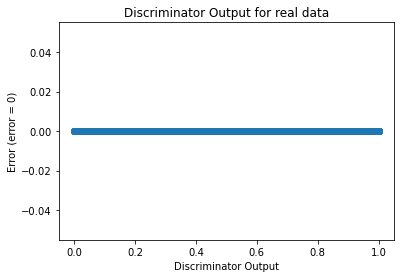

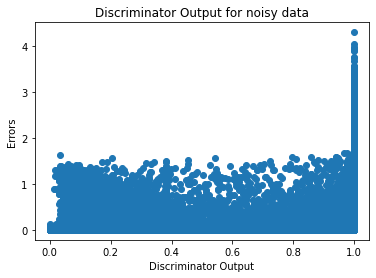

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)